<a href="https://colab.research.google.com/github/mannmoshe/image-processing/blob/main/project/image_processing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing project: <br> Event-based camera visuallization & analysis <br> By Moshe Mann & Yoel Bensoussan

In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from datetime import datetime

## Import event-based camera data files

In [2]:
!wget https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_75Hz_ClearObstacle.zip?raw=true

--2023-02-15 12:44:19--  https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_75Hz_ClearObstacle.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_75Hz_ClearObstacle.zip [following]
--2023-02-15 12:44:19--  https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_75Hz_ClearObstacle.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_75Hz_ClearObstacle.zip [following]
--2023-02-15 12:44:19--  https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_75Hz_ClearObstacle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.

In [3]:
!unzip /content/FlickerLine_75Hz_ClearObstacle.zip?raw\=true

Archive:  /content/FlickerLine_75Hz_ClearObstacle.zip?raw=true
replace FlickerLine_75Hz_Clear.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FlickerLine_75Hz_Clear.csv  
replace FlickerLine_75Hz_Obstacle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FlickerLine_75Hz_Obstacle.csv  


In [4]:
!wget https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_75Hz_pluseNoise.zip?raw=true

--2023-02-15 12:44:57--  https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_75Hz_pluseNoise.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_75Hz_pluseNoise.zip [following]
--2023-02-15 12:44:57--  https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_75Hz_pluseNoise.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_75Hz_pluseNoise.zip [following]
--2023-02-15 12:44:58--  https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_75Hz_pluseNoise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.19

In [5]:
!unzip /content/FlickerLine_75Hz_pluseNoise.zip?raw\=true

Archive:  /content/FlickerLine_75Hz_pluseNoise.zip?raw=true
replace FlickerLine_75Hz_pluseNoise.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: FlickerLine_75Hz_pluseNoise.csv  


In [6]:
!wget https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_85Hz_2files.zip?raw=true

--2023-02-15 12:45:13--  https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_85Hz_2files.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_85Hz_2files.zip [following]
--2023-02-15 12:45:13--  https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_85Hz_2files.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_85Hz_2files.zip [following]
--2023-02-15 12:45:13--  https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_85Hz_2files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conne

In [7]:
!unzip /content/FlickerLine_85Hz_2files.zip?raw\=true

Archive:  /content/FlickerLine_85Hz_2files.zip?raw=true
replace FlickerLine_85Hz_A.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: FlickerLine_85Hz_A.csv  
  inflating: FlickerLine_85Hz_B.csv  


## FlickerLine_75Hz_Clear

In [8]:
meta_data = pd.read_csv('FlickerLine_75Hz_Clear.csv', nrows=0)
meta_data

,# Input: DVXplorer_DXM00137 sizeX: 640 sizeY: 480


In [9]:
sizeX = int(re.search('sizeX: (.*) sizeY', meta_data.columns[0]).group(1))
sizeY = int(re.search('sizeY: (.*)', meta_data.columns[0]).group(1))
print(sizeX, sizeY)

640 480


In [10]:
df = pd.read_csv('FlickerLine_75Hz_Clear.csv', skiprows=1)

In [11]:
df.head()

,timestamp,x,y,polarity
0,1673364248010552,30,174,0
1,1673364248010552,31,478,0
2,1673364248010552,34,477,0
3,1673364248010552,36,472,0
4,1673364248010552,36,477,0


In [12]:
df.shape

(4411868, 4)

In [13]:
df.sort_values('timestamp', inplace=True)

In [14]:
def get_tempo(g):
    g['diff'] = g['polarity'] - g['polarity'].shift(1)
    uplines = g[(g['diff'] == 1)]
    tempos = uplines["timestamp"].shift(-1) - uplines["timestamp"]
    return 1e06/tempos.mean()

In [15]:
good_dots = df.groupby(by=['x','y']).filter(lambda group: 74 <= get_tempo(group) <= 76)

In [16]:
good_dots.head()

,timestamp,x,y,polarity
242,1673364248010552,227,185,0
241,1673364248010552,227,181,0
240,1673364248010552,226,190,0
238,1673364248010552,224,192,0
236,1673364248010552,223,193,0


In [17]:
good_dots.shape

(4046201, 4)

In [18]:
min(good_dots.timestamp)

1673364248010552

In [19]:
start_dt = datetime.fromtimestamp(min(good_dots.timestamp) / 1e6)
end_dt = datetime.fromtimestamp(max(good_dots.timestamp) / 1e6)

In [20]:
print('Start: ' + start_dt.strftime('%H:%M:%S.%f') + ' \nEnd: ' + end_dt.strftime('%H:%M:%S.%f') + ' \nAt: ' + end_dt.strftime('%Y-%m-%d'))

Start: 15:24:08.010552 
End: 15:24:10.880447 
At: 2023-01-10


In [21]:
line_dots = list(set(zip(good_dots.x, good_dots.y)))

In [22]:
len(line_dots)

3136

In [23]:
data = np.zeros((480,640), dtype=np.uint8)

In [24]:
for d in line_dots:
  data[d[1],d[0]] = 1

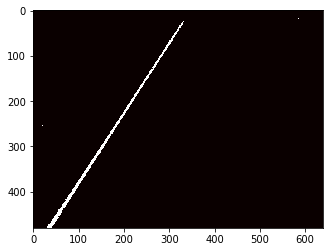

In [25]:
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

In [187]:
df_s = df.sort_values(['x', 'y', 'timestamp'], ascending = [True, True, True])
df_s['diff'] = df_s['polarity'] - df_s['polarity'].shift(1)
df_s = df_s[df_s['diff'] == 1]

In [188]:
df_s.shape

(801313, 5)

In [189]:
agg = []
timestamps_filtered = [ts for ts in df_s['timestamp'].unique() if ts % 75 == 0]
for ts in timestamps_filtered:
  count_d = {}
  df_sub = df_s[df_s['timestamp'] == ts]
  df_sub_dots = list(set(zip(df_sub.x, df_sub.y)))
  sub_dots_not_on_line = list(set(df_sub_dots) - set(line_dots))
  n_dots_not_on_line = len(sub_dots_not_on_line)
  n_dots_on_line = len(list(set(df_sub_dots) - set(sub_dots_not_on_line)))
  n_total_dots = len(df_sub_dots) 
  count_d['timestamp'] = ts #[n_total_dots, n_dots_on_line, n_dots_not_on_line]
  count_d['time'] = datetime.fromtimestamp(ts / 1e6).strftime('%H:%M:%S.%f')
  count_d['total'] = n_total_dots
  count_d['on_line'] = n_dots_on_line
  count_d['not_on_line'] = n_dots_not_on_line
  agg.append(count_d)


In [190]:
df_agg = pd.DataFrame(agg)

In [191]:
df_agg.head()

,timestamp,time,total,on_line,not_on_line
0,1673364248238525,15:24:08.238525,282,277,5
1,1673364248519550,15:24:08.519550,104,98,6
2,1673364248926275,15:24:08.926275,17,0,17
3,1673364249019950,15:24:09.019950,9,0,9
4,1673364249301575,15:24:09.301575,2,0,2


In [192]:
df_agg.shape

(215, 5)

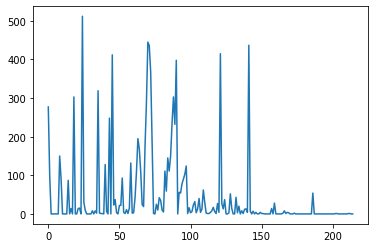

In [195]:
df_agg['on_line'].plot.line()

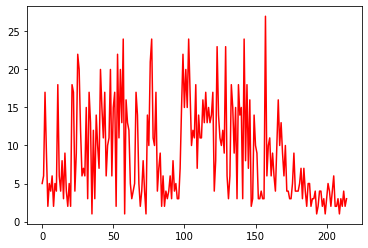

In [198]:
df_agg['not_on_line'].plot.line(color='red')

## FlickerLine_75Hz_Obstacle

In [33]:
meta_data_obs = pd.read_csv('FlickerLine_75Hz_Obstacle.csv', nrows=0)
meta_data_obs

,# Input: DVXplorer_DXM00137 sizeX: 640 sizeY: 480


In [34]:
df_obs = pd.read_csv('FlickerLine_75Hz_Obstacle.csv', skiprows=1)

In [35]:
df_obs.sort_values('timestamp', inplace=True)
good_dots_obs = df_obs.groupby(by=['x','y']).filter(lambda group: 74 <= get_tempo(group) <= 76)
line_dots_obs = list(set(zip(good_dots_obs.x, good_dots_obs.y)))
data_obs = np.zeros((480,640), dtype=np.uint8)
for d in line_dots_obs:
  data_obs[d[1],d[0]] = 1

In [36]:
good_dots_obs.shape

(5427238, 4)

In [37]:
start_dt_obs = datetime.fromtimestamp(min(good_dots_obs.timestamp) / 1e6)
end_dt_obs = datetime.fromtimestamp(max(good_dots_obs.timestamp) / 1e6)

In [38]:
print('Start: ' + start_dt_obs.strftime('%H:%M:%S.%f') + ' \nEnd: ' + end_dt_obs.strftime('%H:%M:%S.%f') + ' \nAt: ' + end_dt_obs.strftime('%Y-%m-%d'))

Start: 15:25:15.040516 
End: 15:25:18.290310 
At: 2023-01-10


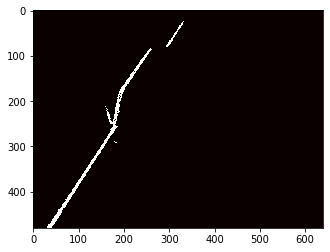

In [39]:
plt.imshow(data_obs, cmap='hot', interpolation='nearest')
plt.show()

In [199]:
df_obs_s = df_obs.sort_values(['x', 'y', 'timestamp'], ascending = [True, True, True])
df_obs_s['diff'] = df_obs_s['polarity'] - df_obs_s['polarity'].shift(1)
df_obs_s = df_obs_s[df_obs_s['diff'] == 1]

In [201]:
agg_obs = []
timestamps_filtered = [ts for ts in df_obs_s['timestamp'].unique() if ts % 75 == 0]
for ts in timestamps_filtered:
  count_d = {}
  df_sub = df_obs_s[df_obs_s['timestamp'] == ts]
  df_sub_dots = list(set(zip(df_sub.x, df_sub.y)))
  sub_dots_not_on_line = list(set(df_sub_dots) - set(line_dots_obs))
  n_dots_not_on_line = len(sub_dots_not_on_line)
  n_dots_on_line = len(list(set(df_sub_dots) - set(sub_dots_not_on_line)))
  n_total_dots = len(df_sub_dots) 
  count_d['timestamp'] = ts #[n_total_dots, n_dots_on_line, n_dots_not_on_line]
  count_d['time'] = datetime.fromtimestamp(ts / 1e6).strftime('%H:%M:%S.%f')
  count_d['total'] = n_total_dots
  count_d['on_line'] = n_dots_on_line
  count_d['not_on_line'] = n_dots_not_on_line
  agg_obs.append(count_d)

In [202]:
df_agg_obs = pd.DataFrame(agg_obs)

In [203]:
df_agg_obs.shape

(212, 5)

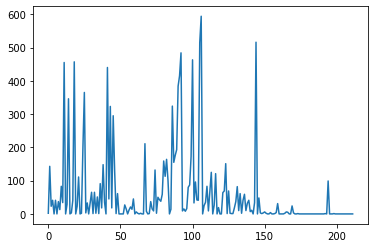

In [207]:
df_agg_obs['on_line'].plot.line()

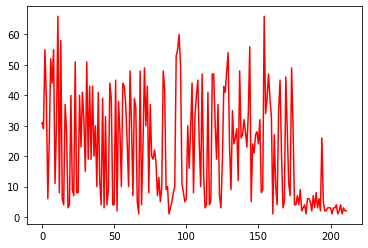

In [208]:
df_agg_obs['not_on_line'].plot.line(color='red')

## FlickerLine_75Hz_pluseNoise

In [45]:
meta_data_pn = pd.read_csv('FlickerLine_75Hz_pluseNoise.csv', nrows=0)
meta_data_pn

,# Input: DVXplorer_DXM00137 sizeX: 640 sizeY: 480


In [46]:
df_pn = pd.read_csv('FlickerLine_75Hz_pluseNoise.csv', skiprows=1)

In [47]:
df_pn.sort_values('timestamp', inplace=True)
good_dots_pn = df_pn.groupby(by=['x','y']).filter(lambda group: 74 <= get_tempo(group) <= 76)
line_dots_pn = list(set(zip(good_dots_pn.x, good_dots_pn.y)))
data_pn = np.zeros((480,640), dtype=np.uint8)
for d in line_dots_pn:
  data_pn[d[1],d[0]] = 1

In [48]:
good_dots_pn.shape

(8873444, 4)

In [49]:
start_dt_pn = datetime.fromtimestamp(min(good_dots_pn.timestamp) / 1e6)
end_dt_pn = datetime.fromtimestamp(max(good_dots_pn.timestamp) / 1e6)

In [50]:
print('Start: ' + start_dt_pn.strftime('%H:%M:%S.%f') + ' \nEnd: ' + end_dt_pn.strftime('%H:%M:%S.%f') + ' \nAt: ' + end_dt_pn.strftime('%Y-%m-%d'))

Start: 15:26:34.670592 
End: 15:26:40.970424 
At: 2023-01-10


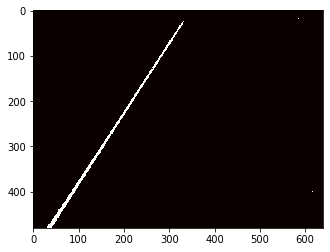

In [51]:
plt.imshow(data_pn, cmap='hot', interpolation='nearest')
plt.show()

In [206]:
df_pn_s = df_pn.sort_values(['x', 'y', 'timestamp'], ascending = [True, True, True])
df_pn_s['diff'] = df_pn_s['polarity'] - df_pn_s['polarity'].shift(1)
df_pn_s = df_pn_s[df_pn_s['diff'] == 1]

In [209]:
agg_pn = []
timestamps_filtered = [ts for ts in df_pn_s['timestamp'].unique() if ts % 75 == 0]
for ts in timestamps_filtered:
  count_d = {}
  df_sub = df_pn_s[df_pn_s['timestamp'] == ts]
  df_sub_dots = list(set(zip(df_sub.x, df_sub.y)))
  sub_dots_not_on_line = list(set(df_sub_dots) - set(line_dots_pn))
  n_dots_not_on_line = len(sub_dots_not_on_line)
  n_dots_on_line = len(list(set(df_sub_dots) - set(sub_dots_not_on_line)))
  n_total_dots = len(df_sub_dots) 
  count_d['timestamp'] = ts #[n_total_dots, n_dots_on_line, n_dots_not_on_line]
  count_d['time'] = datetime.fromtimestamp(ts / 1e6).strftime('%H:%M:%S.%f')
  count_d['total'] = n_total_dots
  count_d['on_line'] = n_dots_on_line
  count_d['not_on_line'] = n_dots_not_on_line
  agg_pn.append(count_d)

In [210]:
df_agg_pn = pd.DataFrame(agg_pn)

In [211]:
df_agg_pn.shape

(426, 5)

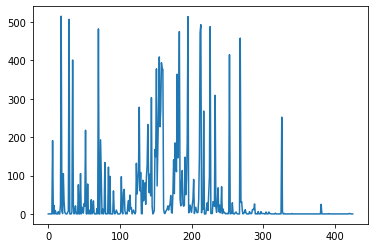

In [212]:
df_agg_pn['on_line'].plot.line()

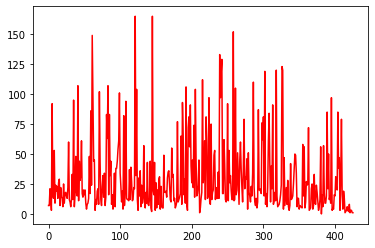

In [213]:
df_agg_pn['not_on_line'].plot.line(color='red')

## FlickerLine_85Hz_A

In [110]:
meta_data_a = pd.read_csv('FlickerLine_85Hz_A.csv', nrows=0)
meta_data_a

,# Input: DVXplorer_DXM00137 sizeX: 640 sizeY: 480


In [58]:
df_a = pd.read_csv('FlickerLine_85Hz_A.csv', skiprows=1)

In [59]:
df_a.sort_values('timestamp', inplace=True)
good_dots_a = df_a.groupby(by=['x','y']).filter(lambda group: 84 <= get_tempo(group) <= 86)
line_dots_a = list(set(zip(good_dots_a.x, good_dots_a.y)))
data_a = np.zeros((480,640), dtype=np.uint8)
for d in line_dots_a:
  data_a[d[1],d[0]] = 1

In [60]:
good_dots_a.shape

(5730692, 4)

In [61]:
start_dt_a = datetime.fromtimestamp(min(good_dots_a.timestamp) / 1e6)
end_dt_a = datetime.fromtimestamp(max(good_dots_a.timestamp) / 1e6)

In [62]:
print('Start: ' + start_dt_a.strftime('%H:%M:%S.%f') + ' \nEnd: ' + end_dt_a.strftime('%H:%M:%S.%f') + ' \nAt: ' + end_dt_a.strftime('%Y-%m-%d'))

Start: 11:10:26.821138 
End: 11:10:34.700831 
At: 2023-01-06


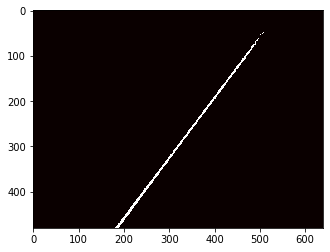

In [63]:
plt.imshow(data_a, cmap='hot', interpolation='nearest')
plt.show()

In [214]:
df_a_s = df_a.sort_values(['x', 'y', 'timestamp'], ascending = [True, True, True])
df_a_s['diff'] = df_a_s['polarity'] - df_a_s['polarity'].shift(1)
df_a_s = df_a_s[df_a_s['diff'] == 1]

In [215]:
agg_a = []
timestamps_filtered = [ts for ts in df_a_s['timestamp'].unique() if ts % 85 == 0]
for ts in timestamps_filtered:
  count_d = {}
  df_sub = df_a_s[df_a_s['timestamp'] == ts]
  df_sub_dots = list(set(zip(df_sub.x, df_sub.y)))
  sub_dots_not_on_line = list(set(df_sub_dots) - set(line_dots_a))
  n_dots_not_on_line = len(sub_dots_not_on_line)
  n_dots_on_line = len(list(set(df_sub_dots) - set(sub_dots_not_on_line)))
  n_total_dots = len(df_sub_dots) 
  count_d['timestamp'] = ts #[n_total_dots, n_dots_on_line, n_dots_not_on_line]
  count_d['time'] = datetime.fromtimestamp(ts / 1e6).strftime('%H:%M:%S.%f')
  count_d['total'] = n_total_dots
  count_d['on_line'] = n_dots_on_line
  count_d['not_on_line'] = n_dots_not_on_line
  agg_a.append(count_d)

In [216]:
df_agg_a = pd.DataFrame(agg_a)

In [217]:
df_agg_a.shape

(447, 5)

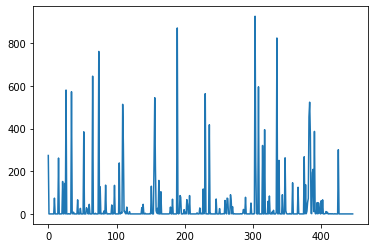

In [218]:
df_agg_a['on_line'].plot.line()

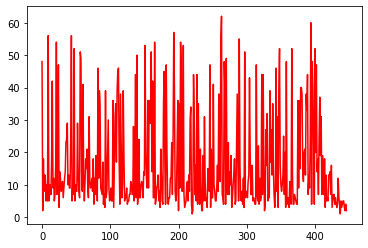

In [219]:
df_agg_a['not_on_line'].plot.line(color='red')

## FlickerLine_85Hz_B

In [84]:
meta_data_b = pd.read_csv('FlickerLine_85Hz_B.csv', nrows=0)
meta_data_b

,# Input: DVXplorer_DXM00137 sizeX: 640 sizeY: 480


In [85]:
df_b = pd.read_csv('FlickerLine_85Hz_B.csv', skiprows=1)

In [86]:
df_b.sort_values('timestamp', inplace=True)
good_dots_b = df_b.groupby(by=['x','y']).filter(lambda group: 84 <= get_tempo(group) <= 86)
line_dots_b = list(set(zip(good_dots_b.x, good_dots_b.y)))
data_b = np.zeros((480,640), dtype=np.uint8)
for d in line_dots_b:
  data_b[d[1],d[0]] = 1

In [88]:
good_dots_b.shape

(3427954, 4)

In [89]:
start_dt_b = datetime.fromtimestamp(min(good_dots_b.timestamp) / 1e6)
end_dt_b = datetime.fromtimestamp(max(good_dots_b.timestamp) / 1e6)

In [90]:
print('Start: ' + start_dt_b.strftime('%H:%M:%S.%f') + ' \nEnd: ' + end_dt_b.strftime('%H:%M:%S.%f') + ' \nAt: ' + end_dt_b.strftime('%Y-%m-%d'))

Start: 11:12:55.001172 
End: 11:12:59.190938 
At: 2023-01-06


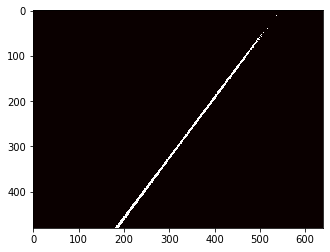

In [91]:
plt.imshow(data_b, cmap='hot', interpolation='nearest')
plt.show()

In [220]:
df_b_s = df_b.sort_values(['x', 'y', 'timestamp'], ascending = [True, True, True])
df_b_s['diff'] = df_b_s['polarity'] - df_b_s['polarity'].shift(1)
df_b_s = df_b_s[df_b_s['diff'] == 1]

In [221]:
agg_b = []
timestamps_filtered = [ts for ts in df_b_s['timestamp'].unique() if ts % 85 == 0]
for ts in timestamps_filtered:
  count_d = {}
  df_sub = df_b_s[df_b_s['timestamp'] == ts]
  df_sub_dots = list(set(zip(df_sub.x, df_sub.y)))
  sub_dots_not_on_line = list(set(df_sub_dots) - set(line_dots_b))
  n_dots_not_on_line = len(sub_dots_not_on_line)
  n_dots_on_line = len(list(set(df_sub_dots) - set(sub_dots_not_on_line)))
  n_total_dots = len(df_sub_dots) 
  count_d['timestamp'] = ts #[n_total_dots, n_dots_on_line, n_dots_not_on_line]
  count_d['time'] = datetime.fromtimestamp(ts / 1e6).strftime('%H:%M:%S.%f')
  count_d['total'] = n_total_dots
  count_d['on_line'] = n_dots_on_line
  count_d['not_on_line'] = n_dots_not_on_line
  agg_b.append(count_d)

In [222]:
df_agg_b = pd.DataFrame(agg_b)

In [223]:
df_agg_b.shape

(260, 5)

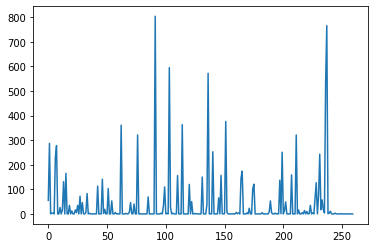

In [224]:
df_agg_b['on_line'].plot.line()

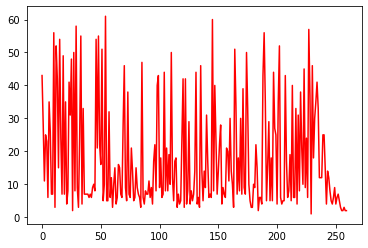

In [226]:
df_agg_b['not_on_line'].plot.line(color='red')